
## Problem 1
Given the Dog class below, complete the following task:
Add a method called 'birthday()' that increments the dog's age by 1


In [29]:
class Dog:
    age = 5
    def __init__(self, name, breed, color):
        self.name = name
        self.breed = breed
        self.color = color

    def get_color(self):
        return f"Color is {self.color}"

    def bark(self):
        return "Woof!"
   
    def get_info(self):
        return f"{self.name} is a {self.breed} and is {self.age} years old"

    def birthday(self):
        self.age += 1
        return f"{self.name} is now {self.age} years old"

## Problem 2
Given the parent Dog class in Problem 1:
Create a ServiceDog child class that inherits from Dog with:
  - Additional attributes: trained_for, certification(True or False)
  - Method to perform service tasks
  - Method to verify certification if the value is True


In [30]:
class ServiceDog(Dog):

    def __init__(self, name, breed, color, trained_for, certification):
        super().__init__(name, breed, color)
        self.trained_for = trained_for
        self.certification = certification
    
    def do_service_task(self):
        if self.certification:
            return f"{self.name} is performing a {self.trained_for} task."
        else:
            return f"{self.name} is not certified to perform task."
        
    def verify_certification(self):
        if self.certification:
            return f"{self.name} is certified for service."
        else:
            return f"{self.name} is not certified for service."

# Problem 3

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets
import numpy as np
import matplotlib.pyplot as plt

Load the MNIST data in PyTorch.

In [32]:
train = torchvision.datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False)

 Build a neural network with two hidden layers (265 nodes for the first hidden layer and 128 nodes for the second hidden layer). For hidden layers, you could choose your own activation functions.

In [33]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 265)
        self.fc2 = nn.Linear(265, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device
net = Net().to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=265, bias=True)
  (fc2): Linear(in_features=265, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


(a) Calculate the total number of parameters in this model (show detailed steps for the calculations).

In [35]:
Layer1 = ((28 * 28) * 265) + 265
Layer2 = (265 * 128) + 128
Layer3 = (128 * 10) + 10
print(f"Total number of parameters: {Layer1 + Layer2 + Layer3}")

Total number of parameters: 243363


(b) Train the model with batch size 128 and use 20 epoch. Draw a plot of accuracy vs. epoch.

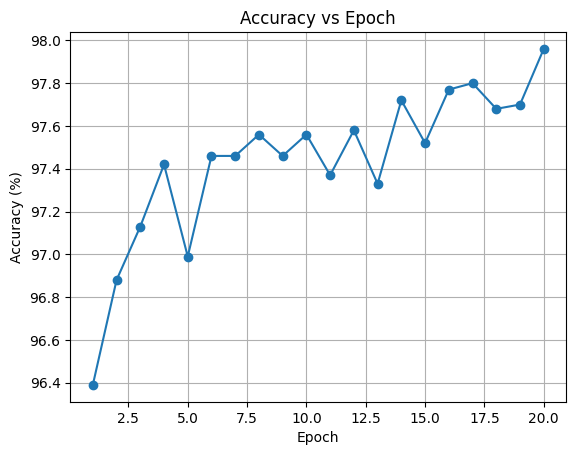

In [36]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)
accuracy_list = []

for epoch in range(20):
    net.train()
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device) 
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = loss_criterion(output, y)
        loss.backward()
        optimizer.step()

    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = net(X.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    accuracy = round(correct / total, 4)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), [a * 100 for a in accuracy_list], marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()


(c) Add a third hidden layer with 128 nodes.  Does adding the third hidden layer improve the performance?

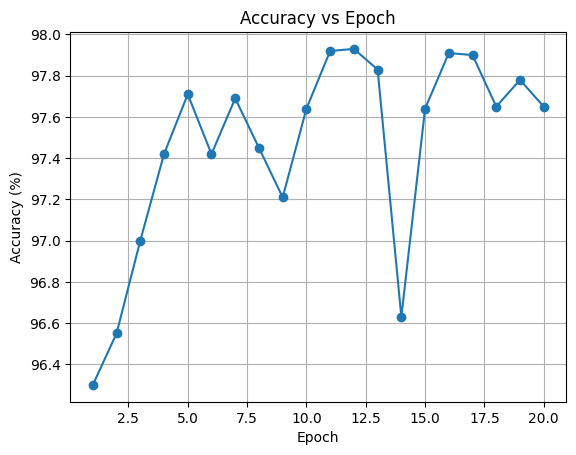

In [37]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 265)
        self.fc2 = nn.Linear(265, 128)
        self.fc3 = nn.Linear(128, 128)  # new hidden layer
        self.fc4 = nn.Linear(128, 10)   # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))        
        x = self.fc4(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net3 = Net3().to(device)

loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net3.parameters(), lr=0.005)
accuracy_list = []

for epoch in range(20):
    net3.train()
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device) 
        net3.zero_grad()
        output = net3(X.view(-1, 28*28))
        loss = loss_criterion(output, y)
        loss.backward()
        optimizer.step()

    net3.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = net3(X.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    accuracy = round(correct / total, 4)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), [a * 100 for a in accuracy_list], marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

The extra hidden layer slightly improved preformance by boosting accuracy by about 0.2%.

# Problem 4


Load MNIST data in PyTorch. Build a linear classifier using Autograd. (Hint: consider the linear classifier as a neural network without a hidden layer. The input is directly connected to the output. Use softmax for the output layer.) Compare with the MLP in Problem 1. Does the neural network improve the test accuracy? Explain the reason based on your understanding.

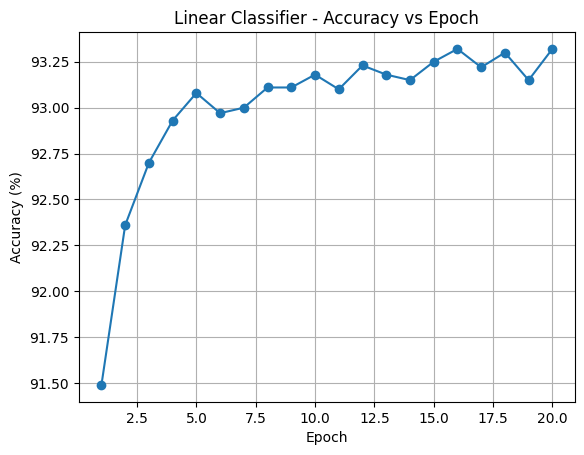

In [38]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 10)  # input directly to output

    def forward(self, x):
        x = self.fc1(x)
        return F.softmax(x, dim=1)  # softmax output layer

device = 'cuda' if torch.cuda.is_available() else 'cpu'
linear_net = LinearClassifier().to(device)

loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_net.parameters(), lr=0.005)

accuracy_list = []

for epoch in range(20):
    linear_net.train()
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device)
        linear_net.zero_grad()
        output = linear_net(X.view(-1, 28*28))
        loss = loss_criterion(output, y)
        loss.backward()
        optimizer.step()

    linear_net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = linear_net(X.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    accuracy = round(correct / total, 4)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), [a * 100 for a in accuracy_list], marker='o')
plt.title('Linear Classifier - Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

The Linear Classifier has a lower test accuracy than the MLP in Problem 3 (~93% vs ~98%). This is becuase the linear classifiers can only draw linear decision boundaries, and goes straight from the raw pixel to a digit. In the MLP, the hidden layers create many more parameters, giving the model the ability to learn more patterns and create abstract features, and the activation functions (I used ReLU) allow for the netwrok to learn curved complex decision boundaries. That is why MLP has a higher accuracy than the linear classifier. 

# Problem 5

Load the fashion_MNIST data in PyTorch (use datasets.FashionMNIST() function to load data).  

In [39]:
train = torchvision.datasets.FashionMNIST('', train=True, download=True,
                                           transform=transforms.Compose
                                           ([transforms.ToTensor()]))
test = torchvision.datasets.FashionMNIST('', train=False, download=True,
                                          transform=transforms.Compose
                                          ([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False)

Build a neural network with two hidden layers (265 nodes for the first hidden layer and 128 nodes for the second hidden layer). 

In [40]:
class FashionNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 265)
        self.fc2 = nn.Linear(265, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

(a) Calculate the total number of parameters in this model (show detailed steps for the calculations).

In [41]:
Layer1 = ((28 * 28) * 265) + 265
Layer2 = (265 * 128) + 128
Layer3 = (128 * 10) + 10
print(f"Total number of parameters: {Layer1 + Layer2 + Layer3}")

Total number of parameters: 243363


(b) Train the model with batch size 128 and use 20 epoch. Draw a plot of accuracy vs. epoch.

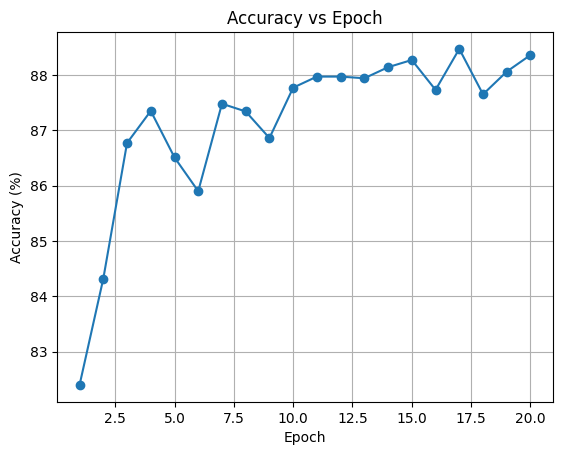

In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device
fashionNet = FashionNet().to(device)

loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fashionNet.parameters(), lr=0.005)
accuracy_list = []


for epoch in range(20):
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device) 
        fashionNet.zero_grad()
        output = fashionNet(X.view(-1, 28*28))
        loss = loss_criterion(output, y)
        loss.backward()
        optimizer.step()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = fashionNet(X.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    accuracy = round(correct / total, 4)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), [a * 100 for a in accuracy_list], marker='o')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

(c) Challenge problem: based on the performance of different Neural networks in (https://github.com/zalandoresearch/fashion-mnist), the performance of MLP of 256-128-100 is 0.8833. Could you adjust the architecture or add regularization to make the accuracy improve to 0.89?

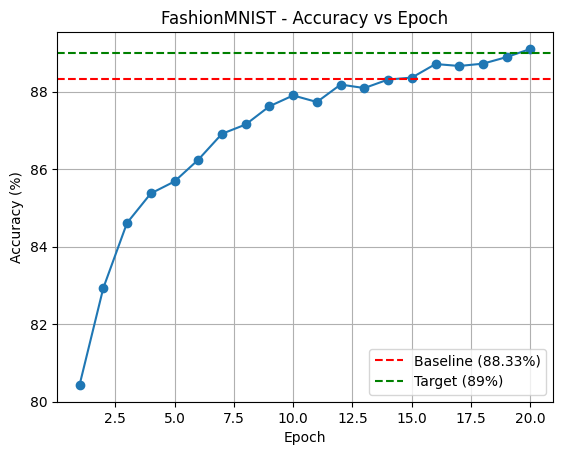

In [43]:
class FashionNet2(nn.Module):
    def __init__(self):
        super(FashionNet2, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

    def compute_l1_loss(self, w):
        return torch.abs(w).sum()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
fashionNet2 = FashionNet2().to(device)

loss_criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(fashionNet2.parameters(), lr=0.0005)

accuracy_list = []

for epoch in range(20):
    fashionNet2.train()
    for data in trainset:
        X, y = data
        X, y = X.to(device), y.to(device)
        fashionNet2.zero_grad()
        output = fashionNet2(X.view(-1, 28*28))
        loss = loss_criterion(output, y)
        loss.backward()
        optimizer.step()

    fashionNet2.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testset:
            X, y = data
            X, y = X.to(device), y.to(device)
            output = fashionNet2(X.view(-1, 784))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    accuracy = round(correct / total, 4)
    accuracy_list.append(accuracy)

plt.plot(range(1, 21), [a * 100 for a in accuracy_list], marker='o')
plt.axhline(y=88.33, color='r', linestyle='--', label='Baseline (88.33%)')
plt.axhline(y=89, color='g', linestyle='--', label='Target (89%)')
plt.title('FashionMNIST - Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()